In [ ]:
#Códigos utilizados para demonstrar uma aplicação de IoT para edifícios inteligentes

In [1]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos



In [ ]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = 'temperature.csv'
dataset = pd.read_csv(nomeArquivo, sep=',') #realiza a leitura do banco de dados

In [ ]:
dataset.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
quartos_df= ["datetime","Vancouver",	"Portland",	"San Francisco",	"Seattle",	"Los Angeles",	"San Diego",	"Las Vegas",	"Phoenix",	"Albuquerque",	"Denver",	"San Antonio",	"Dallas",	"Houston",	"Kansas City",	"Minneapolis"]

In [ ]:
dfEdInteligentes=dataset[quartos_df]

In [ ]:
#adiciona o nova cabeçalho ao bataset
dfEdInteligentes.columns= ["datetime", "Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15"]

In [ ]:
#conhecendo o banco de dados
dfEdInteligentes.head(5) #realizando o print das primeiras 5 linhas do dataframe

,datetime,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166


In [ ]:
dfEdInteligentes.info() #obtendo informações sobre o banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 16 columns):
datetime    45253 non-null object
Q1          44458 non-null float64
Q2          45252 non-null float64
Q3          44460 non-null float64
Q4          45250 non-null float64
Q5          45250 non-null float64
Q6          45252 non-null float64
Q7          45252 non-null float64
Q8          45250 non-null float64
Q9          45252 non-null float64
Q10         45252 non-null float64
Q11         45252 non-null float64
Q12         45249 non-null float64
Q13         45250 non-null float64
Q14         45252 non-null float64
Q15         45240 non-null float64
dtypes: float64(15), object(1)
memory usage: 5.5+ MB


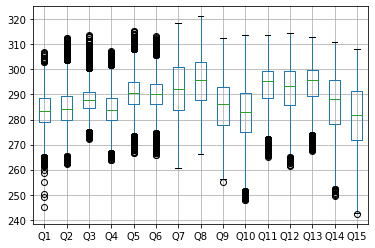

In [ ]:
#realizando um plot dos boxplot
dfEdInteligentes.boxplot()  #caixinhas do q1 e do q13 - NÃO SE TOCAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f043d564a90>,
      dtype=object)

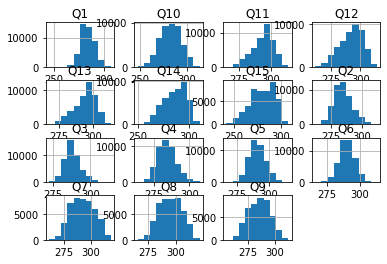

In [ ]:
#realizando o plot do histograma
dfEdInteligentes.hist()

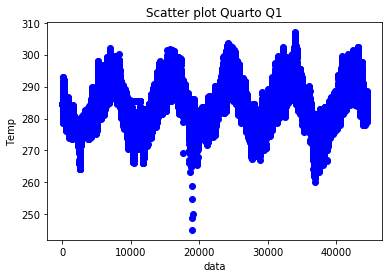

In [ ]:
#realizando o scatterplot de algumas variáveis
plt.scatter(dfEdInteligentes.index, dfEdInteligentes.Q1, c='blue')
plt.title('Scatter plot Quarto Q1')
plt.xlabel('data')
plt.ylabel('Temp')
plt.show()

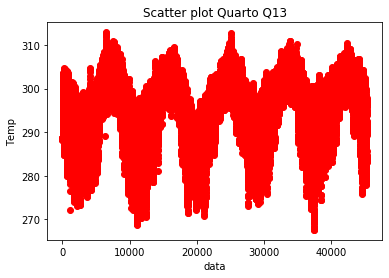

In [ ]:
plt.scatter(dfEdInteligentes.index, dfEdInteligentes.Q13, c='red')
plt.title('Scatter plot Quarto Q13')
plt.xlabel('data')
plt.ylabel('Temp')
plt.show()

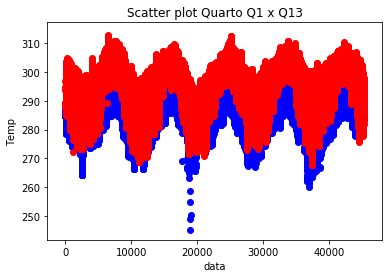

In [ ]:
plt.scatter(dfEdInteligentes.index, dfEdInteligentes.Q1, c='blue')
plt.scatter(dfEdInteligentes.index, dfEdInteligentes.Q13, c='red')
plt.title('Scatter plot Quarto Q1 x Q13')
plt.xlabel('data')
plt.ylabel('Temp')
plt.show()

In [ ]:
#encontrando os valores de máximo e mínimo em cada uma das colunas
dfEdInteligentes.min()

datetime    2012-10-01 12:00:00
Q1                       245.15
Q2                       262.37
Q3                        272.3
Q4                       263.78
Q5                      266.504
Q6                      265.783
Q7                      260.561
Q8                      266.059
Q9                      255.042
Q10                     247.728
Q11                      265.05
Q12                      261.61
Q13                      267.57
Q14                     249.556
Q15                     242.337
dtype: object

In [ ]:
dfEdInteligentes.max()

datetime    2017-11-30 00:00:00
Q1                          307
Q2                       312.52
Q3                       313.62
Q4                        307.3
Q5                       315.47
Q6                       313.36
Q7                       318.64
Q8                       321.22
Q9                       312.71
Q10                      313.75
Q11                      313.66
Q12                       314.4
Q13                      312.91
Q14                      310.97
Q15                      308.24
dtype: object

**Preprocessamento dos dados**

In [ ]:
#Eliminando os Nan
dfEdInteligentes.dropna()

,datetime,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,284.585142,289.408193,289.966352,288.407879,290.119181,287.066931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,277.260000,291.910000,282.010000,292.820000,279.160000,274.150000
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,277.920000,290.910000,282.150000,292.440000,278.820000,274.150000
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,278.020000,290.370000,282.480000,291.440000,279.320000,274.150000
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,277.690000,290.270000,282.950000,290.140000,279.150000,274.280000


In [ ]:
dfEd2=dfEdInteligentes[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15"]]

In [ ]:
#transformando os dados para graus Celsius
dfEd2=dfEd2.apply(lambda x: x-273, axis=1)

In [ ]:
dfEd2.dropna() #retira os valores NaN

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
1,11.630000,9.080000,16.480000,8.800000,18.870000,18.530000,20.410000,23.600000,12.120000,11.610000,16.290000,16.740000,15.270000,16.980000,13.870000
2,11.629041,9.083252,16.474993,8.797217,18.868186,18.533501,20.403141,23.608509,12.154558,11.607306,16.303649,16.762974,15.297576,16.997635,13.893636
3,11.626998,9.091866,16.460618,8.789833,18.862844,18.543355,20.392177,23.631487,12.233952,11.599918,16.338497,16.830767,15.334343,17.038151,13.951401
4,11.624955,9.100481,16.446243,8.782449,18.857503,18.553209,20.381213,23.654466,12.313345,11.592530,16.373345,16.898560,15.371111,17.078666,14.009166
5,11.622911,9.109095,16.431869,8.775065,18.852162,18.563063,20.370249,23.677445,12.392738,11.585142,16.408193,16.966352,15.407879,17.119181,14.066931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,13.440000,20.840000,24.060000,13.150000,26.990000,26.390000,25.430000,29.150000,11.370000,4.260000,18.910000,9.010000,19.820000,6.160000,1.150000
44457,14.870000,21.850000,26.140000,15.140000,28.320000,26.700000,26.430000,30.650000,12.890000,4.920000,17.910000,9.150000,19.440000,5.820000,1.150000
44458,15.420000,22.570000,27.560000,16.440000,28.600000,27.160000,27.560000,31.480000,13.400000,5.020000,17.370000,9.480000,18.440000,6.320000,1.150000
44459,15.650000,21.990000,28.060000,17.590000,28.760000,27.770000,27.810000,31.950000,13.890000,4.690000,17.270000,9.950000,17.140000,6.150000,1.280000


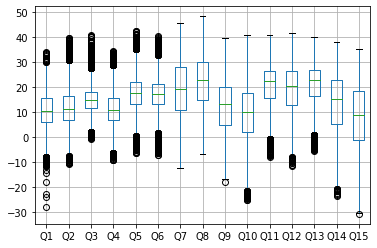

In [ ]:
dfEd2.boxplot()

**Realizando uma análise sobre a variação de temperatura de um quarto para a previsão de séries temporais**

In [ ]:
#selecionando o quarto Q3
serieTemporalQ3=dfEd2["Q3"]

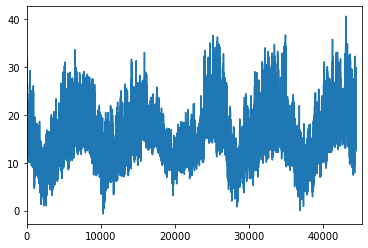

In [ ]:
serieTemporalQ3.plot() #realizando o plot do quarto Q3

In [ ]:
#dividindo os dados para treinamento e teste
serieTreinamento= serieTemporalQ3[:int(0.8*len(serieTemporalQ3))] #dados para treinamento

In [ ]:
type(serieTreinamento.values)

numpy.ndarray

In [ ]:
#normalizando os dados (os algoritmos de ML, em geral, não trabalham bem com dados em escalas diferentes)
from sklearn.preprocessing import MinMaxScaler  #biblioteca utilizada para realizar o preprocessamento dos dados
scaler = MinMaxScaler(feature_range = (0, 1))    #cria o objeto que será utilizado para realizar a normalização dos dados
                                                 # feaure_range = define o intervalo de escala dos dados

dados_normalizados = scaler.fit_transform(serieTreinamento.values.reshape(-1, 1))  # aplica o método de transformação dos dados

In [ ]:
dados_normalizados

array([[       nan],
       [0.4592355 ],
       [0.45910165],
       ...,
       [0.42635659],
       [0.42956429],
       [0.4592355 ]])

In [ ]:
dados_normalizados=dados_normalizados[~np.isnan(dados_normalizados)] #retirando os valores NaN do array

In [ ]:
dados_normalizados=dados_normalizados.reshape(-1,1)

In [ ]:
#verificando o tamanho do vetor
print ("Tamanho dos conjunto de treinamento: ", len(serieTreinamento))


Tamanho dos conjunto de treinamento:  36202


**Aplicando a rede Neural Recorrente para a previsão**

In [ ]:
#Como as redes recorrentes utilizam dados no tempo T e valores passados (T-n), a entrada da rede deve conter os
#valores presentes e os (T-n). Assim, é necessário realizar uma modificação nos dados
features_set = []
labels = []
for i in range(72, len(dados_normalizados)):  # utilizamos 3 dias de dados passados (24*3)
    features_set.append(dados_normalizados[i-72:i, 0])
    labels.append(dados_normalizados[i, 0])

In [ ]:
serieTreinamento.size

36202

In [ ]:
type(dados_normalizados)

numpy.ndarray

In [ ]:
#transformando os dados em um array para serem utilizados como entrada
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
#conferindo a dimensão dos dados
print(features_set.shape) # método utilizado para retornar a dimensão dos dados
print(labels.shape)

(36129, 72)
(36129,)


In [ ]:
#transformando os dados para o formato aceito pelas redes recorrentes do Keras
# 1 - formato em 3D
# (a,b,c) -> a = número de linhas do dataset
#         -> b = número de steps (entradas) da rede
#         -> c = número de saídas (indicators)

# método da biblioteca numpy que é utilizado para converter os dados de entrada (1199,60) em (1199,60,1)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  #
print(features_set.shape)

(36129, 72, 1)


In [ ]:
import tensorflow as tf #biblioteca utilizada para realizar o treinamento do modelo em deep learning

In [ ]:
from tensorflow.keras.models import Sequential  #classe utilizada para criar o modelo sequencial utilizando o keras
from tensorflow.keras.layers import Dense  # Classe utilizada para criar as camadas que são completamente conectadas
from tensorflow.keras.layers import LSTM  # Classe para a rede recorrente utilizando Long Shor Term Memory
from tensorflow.keras.layers import Dropout # Classe utilizada para a camada de dropout (utilizada para evitar o overfiting)

In [ ]:
model = Sequential()  # objeto para a criação do modelo keras sequencial
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  #cria a camada de entrada
# como pode ser visto, ela é adicionada como uma pilha, cada nova camada é adicionada com o método add
# na camada de entrada, é necessário definir o tamanho do vetor de entrada (input_shape)
# units=50 indica que na camada de entrada devem existir 50 neurônios
# return_sequences= True indica que devem ser adicionadas novas camadas

In [ ]:
#adição da camada de dropout
model.add(Dropout(0.2))  # o valor de 0.2 indica que 20% dos neurônios dessa camada serão perdidos para cada interação

In [ ]:
#Adicionando mais camadas ao modelo
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))  # como essa é a última camada LSTM utilizada, a variável return_sequences=False
model.add(Dropout(0.2))

In [ ]:
#adiciona a camada de saída com apenas 1 neurônio, pois vamos realizar a previsão de apenas uma variável (Previsão do valor de abertura)
model.add(Dense(units = 1))

In [ ]:
#comando utilizado para ver a configuração do nosso modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 72, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 72, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 72, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 72, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
#definição do tipo de função perda a ser utilizada e do tipo do otimizador
# o otimizador é utilizado para minimizar a função perda
# a função perda indica como deve ser calculado o erro do modelo (valor real - valor previsto)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#treinamento do modelo
model.fit(features_set, labels, epochs = 2, batch_size = 32)
# valores de entrada
# saída
# número épocas para o treinamento (vezes em que vamos realizar interações durante o treinamento)
#batch_size = quantidade de dados utilizados por vez para realizar o treinamento

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 36129 samples
Epoch 1/2
36129/36129 [==============================] - 298s 8ms/sample - loss: 0.0068
Epoch 2/2
36129/36129 [==============================] - 298s 8ms/sample - loss: 0.0026


In [ ]:
#dados para teste
serieTeste=serieTemporalQ3[int(0.8*len(serieTemporalQ3)):] #dados para teste

In [ ]:
serieTeste

36202    16.76
36203    17.53
36204    15.84
36205    13.66
36206    12.43
         ...  
45248      NaN
45249      NaN
45250      NaN
45251      NaN
45252      NaN
Name: Q3, Length: 9051, dtype: float64

In [ ]:
serieTeste=serieTeste[~np.isnan(serieTeste)] #retirando os valores NaN do array teste

In [ ]:
print ("Tamanho dos conjunto de teste: ", len(serieTeste))

Tamanho dos conjunto de teste:  8259


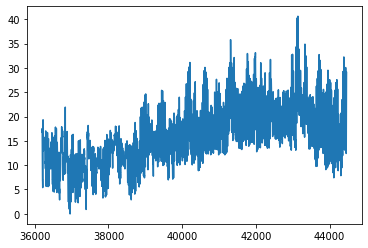

In [ ]:
plt.plot(serieTeste) #plot dos dados utilizados para o teste da previsão

In [ ]:
#normalização dos dados para teste, como fizemos com os dados de treinamento
serieTeste = serieTeste.values.reshape(-1,1)
serieTeste = scaler.transform(serieTeste)

In [ ]:
serieTeste

array([[0.46672013],
       [0.48730286],
       [0.44212777],
       ...,
       [0.75541299],
       [0.7687784 ],
       [0.79577653]])

In [ ]:
#preparação dos 8258 dados a setem utilizado
test_features = []
for i in range(72, len(serieTeste)):
    test_features.append(serieTeste[i-72:i, 0])

In [ ]:
#preparando os dados como entrada para o modelo de previsão
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
#previsão utilizando o modelo gerado
previsao = model.predict(test_features)

In [ ]:
#inverte a transformação (normalização) dos dados de previsão
previsao = scaler.inverse_transform(previsao)

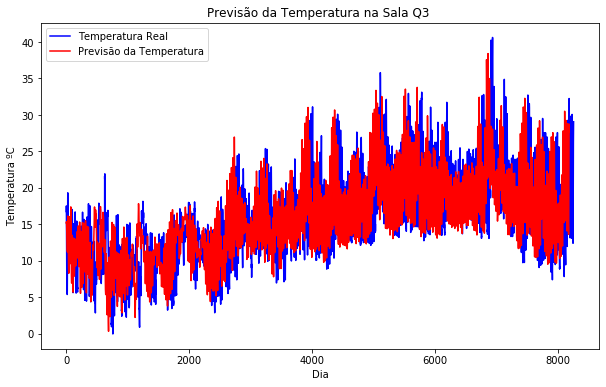

In [ ]:
#plot do resultado da previsão e do real
plt.figure(figsize=(10,6))
plt.plot(serieTemporalQ3[int(0.8*len(serieTemporalQ3)):].values, color='blue', label='Temperatura Real')
plt.plot(previsao , color='red', label='Previsão da Temperatura')
plt.title('Previsão da Temperatura na Sala Q3 ')
plt.xlabel('Dia')
plt.ylabel('Temperatura ºC')
plt.legend()
plt.show()